# K-MEAN CLUSTERING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"D:\Datasets\Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


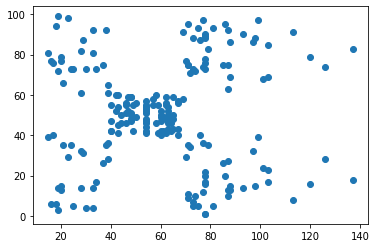

In [3]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])

In [4]:

x = df.iloc[:,[3,4]]


In [5]:
# elbow method

In [6]:

wcss = []   #with in cluster sum of square

for i in range(1,10):
    km = KMeans(n_clusters=i)
    
    km.fit(x)
    wcss.append(km.inertia_)
    

In [7]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30552.71402546729,
 25011.83934915659,
 22119.99312141347]

Text(0, 0.5, 'wcss')

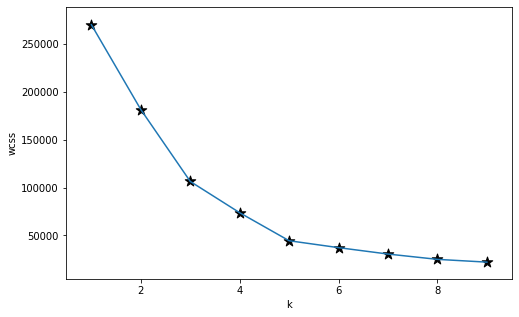

In [8]:
plt.figure(figsize=(8,5))
plt.plot(range(1,10),wcss)
plt.scatter(range(1,10),wcss,marker ="*" ,color="k", s=123)
plt.xlabel("k")
plt.ylabel("wcss")

In [9]:
km = KMeans(n_clusters=5)
yp = km.fit_predict(x)
yp

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [10]:
km.cluster_centers_  #centeroid

array([[25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [11]:
x["cluster"]=yp
x.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


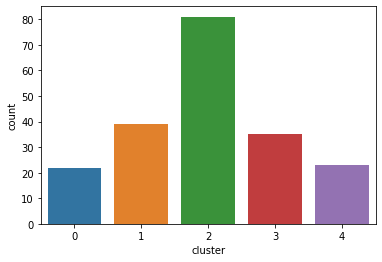

In [12]:
sn.countplot(x.cluster)

In [13]:
c1 = x[x.cluster==0]
c2 = x[x.cluster==1]
c3 = x[x.cluster==2]
c4 = x[x.cluster==3]
c5 = x[x.cluster==4]

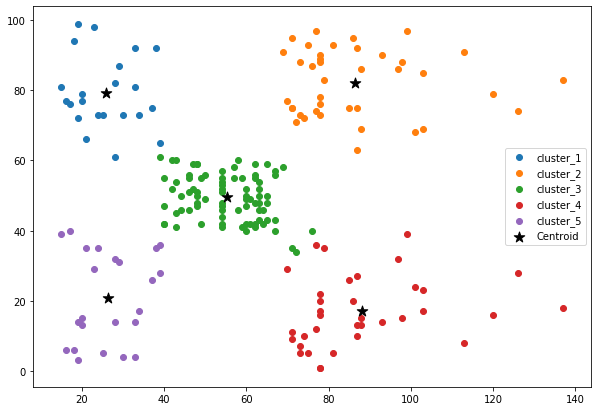

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(c1["Annual Income (k$)"],c1["Spending Score (1-100)"], label="cluster_1")
plt.scatter(c2["Annual Income (k$)"],c2["Spending Score (1-100)"], label="cluster_2")
plt.scatter(c3["Annual Income (k$)"],c3["Spending Score (1-100)"], label="cluster_3")
plt.scatter(c4["Annual Income (k$)"],c4["Spending Score (1-100)"], label="cluster_4")
plt.scatter(c5["Annual Income (k$)"],c5["Spending Score (1-100)"], label="cluster_5")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], marker="*",s=123,color = "k",label = "Centroid")
plt.legend()

In [15]:
x1 = x.drop("cluster",axis=1)
y1 = x.cluster

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size = 0.2)

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
yp1=knn.predict(x_test)
yp1

array([0, 1, 1, 0, 0, 1, 3, 2, 2, 0, 3, 1, 3, 1, 2, 2, 2, 1, 3, 2, 4, 2,
       4, 1, 2, 1, 2, 4, 0, 4, 2, 3, 2, 0, 3, 3, 2, 2, 1, 0])

In [19]:
print(accuracy_score(y_test,yp1))

1.0


In [20]:
cm = confusion_matrix(y_test,yp1)
cm

array([[ 7,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0],
       [ 0,  0, 13,  0,  0],
       [ 0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  4]], dtype=int64)

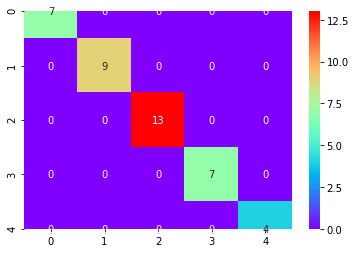

In [21]:
sn.heatmap(cm,annot = True , cmap = "rainbow")